In [3]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np

In [4]:
df = pd.read_csv("toxicity/train.csv")

In [5]:
df.shape

(159571, 8)

In [6]:
 df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
da = df.copy()

In [8]:
da.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
da = da.sample(frac=1).reset_index()

In [8]:
da.head()

,index,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,96153,026369025d1ffa8e,"Nope, Wikipedia policy goes against inclusion ...",0,0,0,0,0,0
1,41546,6ece8c557fb1b49b,""" * No ads. All banner ads will be removed ...",0,0,0,0,0,0
2,47650,7f4ed44fda6ca573,Dear Cirt. You are censoring my comments on a ...,0,0,0,0,0,0
3,27440,489e533a59f171d9,"""\n\nYour entry at Deindustrialization\nIf you...",0,0,0,0,0,0
4,58429,9c703143ff1af2c8,"""\n \nJohn Reaves, an admirer of """"femme fatal...",0,0,0,0,0,0


In [13]:
from tensorflow.keras.layers import TextVectorization

In [15]:
x = df["comment_text"]
y = df[df.columns[2:]].values

In [16]:
Max_words = 200000 # number of words in the vocab

In [17]:
vectorizer = TextVectorization(max_tokens= Max_words,
                               output_sequence_length= 2000,
                               output_mode='int')

In [18]:
vectorizer.adapt(x.values)

In [19]:
vectorized_text = vectorizer(x.values)

In [20]:
vectorized_text

<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(20)
dataset = dataset.prefetch(10)

In [15]:
batch_x , batch_y = dataset.as_numpy_iterator().next()

In [16]:
batch_x.shape

(20, 2000)

In [17]:
batch_y.shape

(20, 6)

In [18]:
len(dataset)

7979

In [19]:
dataset.shuffle(buffer_size =5,seed=42)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 2000), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [20]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
len(train)

5585

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 2000), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [23]:
len(val)

1595

In [24]:
train_generator = train.as_numpy_iterator()
train_generator.next()

(array([[   46,    33,    15, ...,     0,     0,     0],
        [    7,    28,   895, ...,     0,     0,     0],
        [  919,   636,    45, ...,     0,     0,     0],
        ...,
        [   94,    61,   252, ...,     0,     0,     0],
        [32490,  5672, 32491, ...,     0,     0,     0],
        [17615, 94238, 52092, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [26]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(Max_words+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers

model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [27]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=["accuracy"])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                        

In [29]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
5585/5585 [==============================] - 615s 109ms/step - loss: 0.0626 - accuracy: 0.9856 - val_loss: 0.0467 - val_accuracy: 0.9943
Epoch 2/10
5585/5585 [==============================] - 621s 111ms/step - loss: 0.0471 - accuracy: 0.9942 - val_loss: 0.0398 - val_accuracy: 0.9949
Epoch 3/10
5585/5585 [==============================] - 619s 111ms/step - loss: 0.0417 - accuracy: 0.9943 - val_loss: 0.0379 - val_accuracy: 0.9940
Epoch 4/10
5585/5585 [==============================] - 614s 110ms/step - loss: 0.0380 - accuracy: 0.9940 - val_loss: 0.0326 - val_accuracy: 0.9946
Epoch 5/10
5585/5585 [==============================] - 612s 110ms/step - loss: 0.0344 - accuracy: 0.9940 - val_loss: 0.0312 - val_accuracy: 0.9946
Epoch 6/10
5585/5585 [==============================] - 629s 113ms/step - loss: 0.0307 - accuracy: 0.9941 - val_loss: 0.0276 - val_accuracy: 0.9946
Epoch 7/10
5585/5585 [==============================] - 608s 109ms/step - loss: 0.0283 - accuracy: 0.9924 - val_

In [10]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

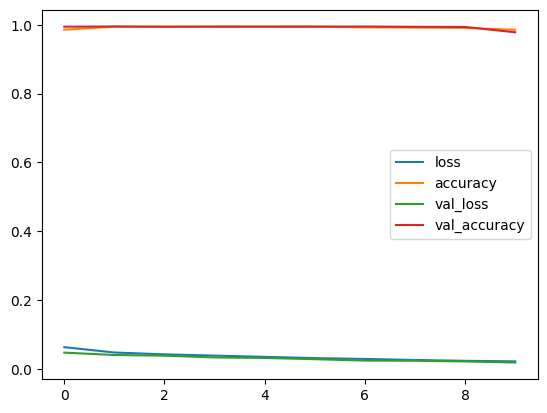

In [31]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [32]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [33]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [34]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 905ms/step


In [35]:
res

array([[0.98884857, 0.18340497, 0.95643854, 0.14714378, 0.9362806 ,
        0.41912037]], dtype=float32)

In [36]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [37]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [38]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 133ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [39]:
res.shape

(1, 6)

In [9]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [42]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 52ms/step


In [43]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.901207447052002, Recall:0.9201456904411316, Accuracy:0.4479297399520874


In [44]:
#!pip install gradio jinja2

In [1]:
import tensorflow as tf
import gradio as gr

C:\Users\vaibh\Desktop\toxicity\toxic\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
model.save('toxicity.h5')

In [21]:
model = tf.keras.models.load_model('toxicity.h5')

input_str = vectorizer('hey i freaken hate you!')

res = model.predict(np.expand_dims(input_str,0))
res



1/1 [==============================] - 5s 5s/step


array([[0.8852849 , 0.0022274 , 0.06655262, 0.01431171, 0.59131926,
        0.06947771]], dtype=float32)

In [22]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [23]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text


In [24]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.components.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [25]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: C:\Users\vaibh\Desktop\toxicity\toxic\lib\site-packages\gradio\frpc_windows_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.2
3. Move the file to this location: C:\Users\vaibh\Desktop\toxicity\toxic\lib\site-packages\gradio


1/1 [==============================] - 0s 124ms/step
